In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
magnus_df = pd.read_pickle("./magnus.pkl")

In [3]:
magnus_df

,opponent,player_color,opponent_rating,player_rating,length,year,opening_moves,opening,opening_variant,result,rating_diff
0,Wesley So,white,2741.0,2881.0,29,2021,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6,Ruy López Opening,"Berlin, Rio Gambit Accepted, 5.Re1 Nd6 6.Nxe5",draw,140.0
1,Levon Aronian,black,2761.0,2881.0,60,2021,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6,Ruy López Opening,"Morphy Defense, Anti-Marshall Variation, 8......",draw,120.0
2,Daniil Dubov,black,2710.0,2847.0,41,2021,1. d4 d5 2. c4 c5 3. Nf3 cxd4,Queen's Gambit Declined,Austrian Variation,win,137.0
3,Hikaru Nakamura,black,2736.0,2847.0,39,2021,1. d4 d5 2. c4 e6 3. Nc3 a6,Queen's Gambit Declined,Janowski Variation,win,111.0
4,Andrey Esipenko,black,2716.0,2847.0,36,2021,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5,Giuoco Piano Game,"Main Line, Giuoco Pianissimo Variation",draw,131.0
...,...,...,...,...,...,...,...,...,...,...,...
1495,Veselin Topalov,white,2798.0,2876.0,60,2015,1. d4 d5 2. c4 c6 3. Nf3 Nf6,Semi-Slav Defense,NaN,loss,78.0
1496,Ivan Saric,white,2666.0,2862.0,49,2015,1. e4 c5 2. Nf3 Nc6 3. Nc3 Nf6,Sicilian Defense,Old Sicilian Variation,draw,196.0
1497,Maxime Vachier-Lagrave,white,2731.0,2853.0,43,2015,1. Nf3 Nf6 2. c4 g6 3. g3 Bg7,English Opening,"Anglo-Indian, King's Indian Defense",win,122.0
1498,Alexander Grischuk,white,2771.0,2853.0,66,2015,1. e4 c5 2. Nf3 d6 3. d4 cxd4,Sicilian Defense,"Open, Najdorf, Opočenský Variation",loss,82.0


In [4]:
magnus_df.groupby('opponent').mean()

,opponent_rating,player_rating,length,rating_diff
opponent,,,,
A R Saleh Salem,2638.000000,2837.0,62.000000,199.000000
Abhijeet Gupta,2636.000000,2839.0,59.500000,203.000000
Abhijit Kunte,2491.000000,2838.0,44.000000,347.000000
Adam Tukhaev,2527.000000,2835.0,72.000000,308.000000
Ahmed Adly,2599.000000,2840.0,47.000000,241.000000
...,...,...,...,...
Yu Yangyi,2744.142857,2867.0,44.714286,122.857143
Yuri Vovk,2617.000000,2850.0,94.000000,233.000000
Yuriy Kryvoruchko,2710.000000,2850.0,38.000000,140.000000


In [5]:
magnus_df.describe()

,opponent_rating,player_rating,length,rating_diff
count,1486.000000,1497.000000,1500.000000,1486.000000
mean,2721.942127,2853.083500,46.486000,131.131225
std,112.130603,17.176159,16.383063,111.800127
min,1650.000000,2822.000000,5.000000,-14.000000
25%,2699.000000,2837.000000,35.000000,66.000000
50%,2761.000000,2851.000000,43.000000,98.500000
75%,2782.000000,2870.000000,56.000000,156.750000
max,2900.000000,2886.000000,127.000000,1207.000000


In [6]:
mask = magnus_df['opponent'].value_counts()
magnus_df = magnus_df[magnus_df['opponent'].isin(mask.index[mask>1])]

In [7]:
num_magnus_df = magnus_df[magnus_df.describe().columns]

In [8]:
cat_magnus_df = magnus_df[['opponent', 'player_color', 'year', 'opening_moves', 'opening', 'opening_variant', 'result']]

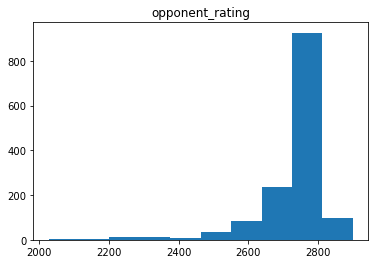

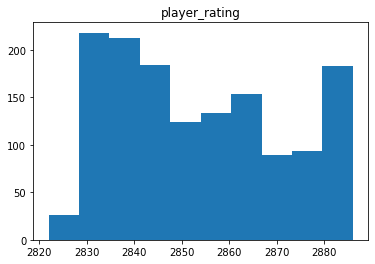

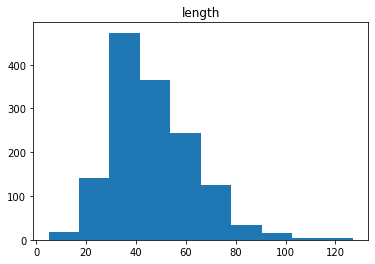

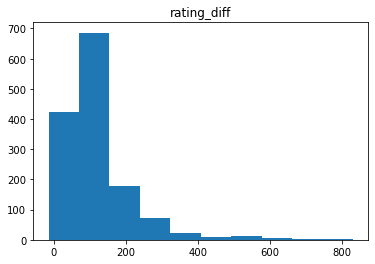

In [9]:
for column in num_magnus_df:
    plt.hist(num_magnus_df[column])
    plt.title(column)
    plt.show()

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


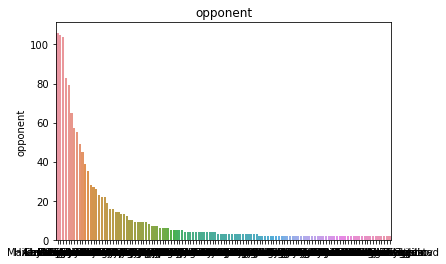

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


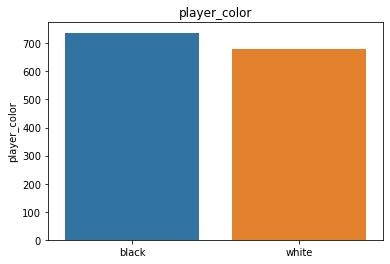

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


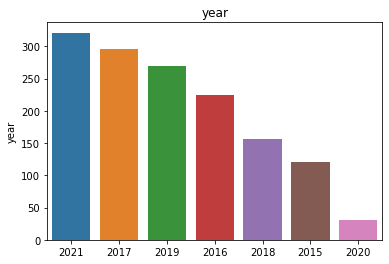

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


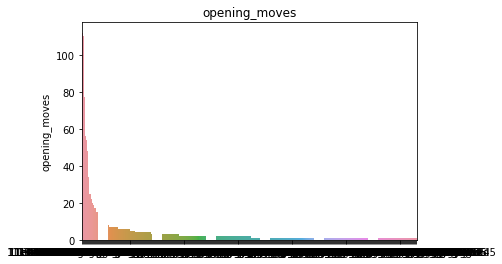

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


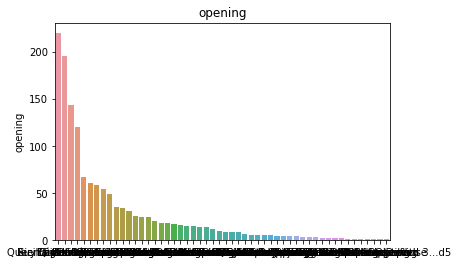

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


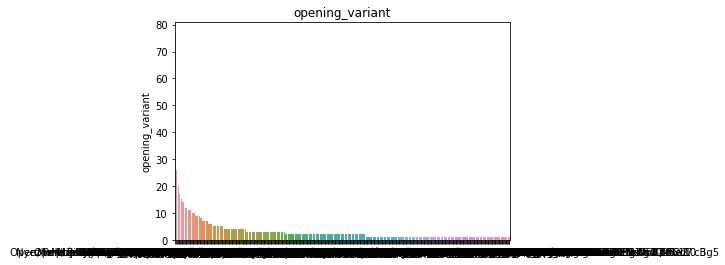

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


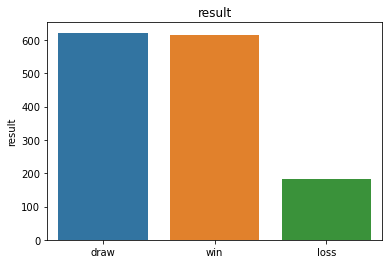

In [10]:
for col in cat_magnus_df.columns:
    sns.barplot(cat_magnus_df[col].value_counts().index, cat_magnus_df[col].value_counts()).set_title(col)
    plt.show()

In [11]:
candidate_list = ['Hikaru Nakamura', 'Teimour Radjabov', 'Jan-Krzysztof Duda', 'Ding Liren', 'Alireza Firouzja', 'Fabiano Caruana', 'Ian Nepomniachtchi', 'Richard Rapport']

for candidate in candidate_list: 
    print(magnus_df[magnus_df['opponent'] == candidate]['opponent'].value_counts())

Hikaru Nakamura    106
Name: opponent, dtype: int64
Teimour Radjabov    28
Name: opponent, dtype: int64
Jan-Krzysztof Duda    13
Name: opponent, dtype: int64
Ding Liren    83
Name: opponent, dtype: int64
Alireza Firouzja    10
Name: opponent, dtype: int64
Fabiano Caruana    49
Name: opponent, dtype: int64
Ian Nepomniachtchi    57
Name: opponent, dtype: int64
Richard Rapport    9
Name: opponent, dtype: int64


<AxesSubplot:>

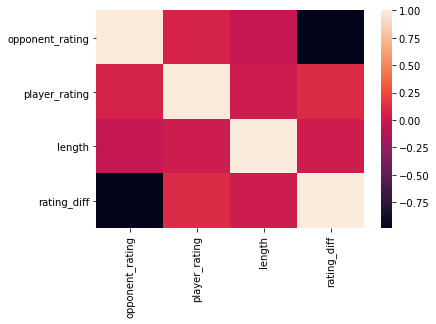

In [12]:
sns.heatmap(magnus_df.corr())